In [4]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

Import data and explore

In [11]:
cases = pd.read_csv('data/COVID_CountByZipPerDate 03292021.csv')
cases.head(5)

,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1


In [12]:
vaccines = pd.read_csv('data/vaccine_with_protocol.csv')
vaccines.head(5)

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot


In [13]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Specimen Collection Date  8832 non-null   object 
 1   Zip                       8456 non-null   float64
 2   Cases                     8832 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 207.1+ KB


In [15]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vacc_date    6694 non-null   object 
 1   zipcode      6462 non-null   float64
 2   count_given  6686 non-null   float64
 3   dose_nbr     6686 non-null   float64
 4   protocol     6694 non-null   object 
dtypes: float64(3), object(2)
memory usage: 261.6+ KB


In [28]:
vaccines['count_given'].sum()

334890.0

In [27]:
cases['Cases'].sum()

93619

In [32]:
vac_by_zip = vaccines.groupby('zipcode')['count_given'].sum()
vac_by_zip

zipcode
37013.0    27167.0
37027.0      506.0
37069.0       89.0
37072.0    13108.0
37076.0    16855.0
37080.0     3078.0
37115.0    12827.0
37138.0    10873.0
37189.0     1650.0
37201.0      756.0
37203.0    11678.0
37204.0     9723.0
37205.0    24451.0
37206.0    14310.0
37207.0    13888.0
37208.0     8262.0
37209.0    20553.0
37210.0     5493.0
37211.0    28477.0
37212.0    10877.0
37213.0      102.0
37214.0    13573.0
37215.0    19915.0
37216.0    10253.0
37217.0     8613.0
37218.0     6987.0
37219.0      891.0
37220.0     5190.0
37221.0    27622.0
37228.0     1040.0
37238.0        5.0
Name: count_given, dtype: float64

In [36]:
cases_by_zip = cases.groupby('Zip')['Cases'].sum()
cases_by_zip

Zip
37013.0    13354
37027.0      231
37069.0       16
37072.0     2984
37076.0     4279
37080.0      574
37115.0     4574
37138.0     2359
37189.0      479
37201.0      299
37203.0     3346
37204.0     1786
37205.0     2566
37206.0     3112
37207.0     4729
37208.0     2428
37209.0     5072
37210.0     2100
37211.0    10233
37212.0     1823
37213.0       65
37214.0     3508
37215.0     2438
37216.0     2011
37217.0     3907
37218.0     1785
37219.0      270
37220.0      656
37221.0     3910
37228.0      310
37238.0        3
Name: Cases, dtype: int64

<AxesSubplot:xlabel='zipcode'>

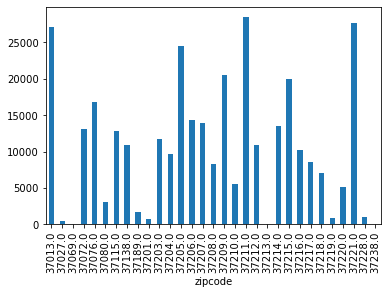

In [37]:
vac_by_zip.plot.bar()

<AxesSubplot:xlabel='Zip'>

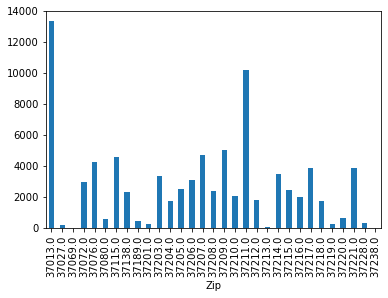

In [38]:
cases_by_zip.plot.bar()